In [1]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from matplotlib import rc

/work/shuhei-ky/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
exp_id = 'kitti_centernet-2'
arch = 'dladcnddu_34'
exp_dir = f'/work/shuhei-ky/exp/CenterNet/models/gmm/{exp_id}'

In [50]:
#logits_kitti = torch.load(f"{exp_dir}/logits_dladcnddu_34_kitti.pt").cpu()
#logits_weather_kitti = torch.load(f"{exp_dir}/logits_dladdu_34_weather_kitti.pt").cpu()
#logits_bdd = torch.load(f"{exp_dir}/logits_dladdu_34_bdd.pt").cpu()
#logits_coco = torch.load(f"{exp_dir}/logits_dladdu_34_coco.pt").cpu()

densities_kitti = torch.load(f"{exp_dir}/densities_{arch}_kitti.pt").reshape(-1, 100).cpu()
#densities_noise_kitti = torch.load(f"{exp_dir}/densities_{arch}_noise_kitti.pt").cpu()
#densities_weather_kitti = torch.load(f"{exp_dir}/densities_{arch}_weather_kitti.pt").cpu()
densities_coco = torch.load(f"{exp_dir}/densities_{arch}_coco.pt").reshape(-1, 100).cpu()

entropies_kitti = torch.load(f"{exp_dir}/entropies_{arch}_kitti.pt").reshape(-1, 100).cpu()
#entropies_noise_kitti = torch.load(f"{exp_dir}/entropies_{arch}_noise_kitti.pt").cpu()
#entropies_weather_kitti = torch.load(f"{exp_dir}/entropies_{arch}_weather_kitti.pt").cpu()
entropies_coco = torch.load(f"{exp_dir}/entropies_{arch}_coco.pt").reshape(-1, 100).cpu()

In [51]:
epistemic_uncertainties_kitti = torch.load(f"{exp_dir}/epistemic_uncertainties_{arch}_kitti.pt")
aleatoric_uncertainties_kitti = torch.load(f"{exp_dir}/aleatoric_uncertainties_{arch}_kitti.pt")
#epistemic_uncertainties_noise_kitti = torch.load(f"{exp_dir}/epistemic_uncertainties_{arch}_noise_kitti.pt")
#aleatoric_uncertainties_noise_kitti = torch.load(f"{exp_dir}/aleatoric_uncertainties_{arch}_noise_kitti.pt")
epistemic_uncertainties_coco = torch.load(f"{exp_dir}/epistemic_uncertainties_{arch}_coco.pt")
aleatoric_uncertainties_coco = torch.load(f"{exp_dir}/aleatoric_uncertainties_{arch}_coco.pt")

In [52]:
id_tp_indices_kitti = torch.load(f"{exp_dir}/id_tp_indices_kitti.pt")
ood_tp_indices_kitti = torch.load(f"{exp_dir}/ood_tp_indices_kitti.pt")
all_tp_indices_kitti = torch.load(f"{exp_dir}/all_tp_indices_kitti.pt")
id_tp_indices_coco = torch.load(f"{exp_dir}/id_tp_indices_coco.pt")
ood_tp_indices_coco = torch.load(f"{exp_dir}/ood_tp_indices_coco.pt")
all_tp_indices_coco = torch.load(f"{exp_dir}/all_tp_indices_coco.pt")

In [69]:
thresholds = np.array([n /100 for n in range(0, 100, 5)])
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [26]:
for key in all_tp_indices_coco.keys():
    results_images_th_dict = all_tp_indices_coco[key]
    for th in results_images_th_dict.keys():
        results_images = results_images_th_dict[th]
        for i, results_image in enumerate(results_images):
            if len(results_image) == 0:
                continue
            print(f"{key}, {i}, {th}:", results_image)

(0, 0, 0), 831, 0.0: [{'gt': 5, 'dt': 38}]
(0, 1, 0), 831, 0.0: [{'gt': 5, 'dt': 38}]
(0, 2, 0), 831, 0.0: [{'gt': 5, 'dt': 38}]
(4, 0, 0), 1929, 0.0: [{'gt': 0, 'dt': 72}]
(4, 1, 0), 1929, 0.0: [{'gt': 0, 'dt': 72}]
(4, 2, 0), 1929, 0.0: [{'gt': 0, 'dt': 72}]
(5, 0, 0), 844, 0.0: [{'gt': 0, 'dt': 79}]
(5, 1, 0), 844, 0.0: [{'gt': 0, 'dt': 79}]
(5, 2, 0), 844, 0.0: [{'gt': 0, 'dt': 79}]
(10, 0, 0), 410, 0.0: [{'gt': 16, 'dt': 57}]
(10, 1, 0), 410, 0.0: [{'gt': 16, 'dt': 57}]
(10, 2, 0), 410, 0.0: [{'gt': 16, 'dt': 57}]
(11, 0, 0), 1485, 0.0: [{'gt': 1, 'dt': 72}]
(11, 0, 0), 1492, 0.0: [{'gt': 0, 'dt': 72}]
(11, 1, 0), 1485, 0.0: [{'gt': 1, 'dt': 72}]
(11, 1, 0), 1492, 0.0: [{'gt': 0, 'dt': 72}]
(11, 2, 0), 1485, 0.0: [{'gt': 1, 'dt': 72}]
(11, 2, 0), 1492, 0.0: [{'gt': 0, 'dt': 72}]
(15, 0, 0), 1767, 0.0: [{'gt': 12, 'dt': 69}]
(15, 1, 0), 1767, 0.0: [{'gt': 12, 'dt': 69}]
(15, 2, 0), 1767, 0.0: [{'gt': 12, 'dt': 69}]
(17, 0, 0), 705, 0.0: [{'gt': 0, 'dt': 41}, {'gt': 1, 'dt': 49}]
(1

In [54]:
id_kitti_densities_dict, id_kitti_entropies_dict = {}, {}
ood_kitti_densities_dict, ood_kitti_entropies_dict = {}, {}
for l in range(3): # difficulties
    id_densities, ood_densities = {}, {}
    id_entropies, ood_entropies = {},{}
    for m in range(3): # classes
        id_tp_indices = id_tp_indices_kitti[m, l, 0]
        ood_tp_indices = ood_tp_indices_kitti[m, l, 0]
        for th in id_tp_indices.keys():
            if th not in id_densities.keys():
                id_densities[th] = []
                ood_densities[th] = []
                id_entropies[th] = []
                ood_entropies[th] = []
            for img_id, id_dicts_img in enumerate(id_tp_indices[th]):
                for d in id_dicts_img:
                    if len(d) == 0:
                        continue
                    gt = d['gt']
                    dt = d['dt']
                    id_densities[th].append(densities_kitti[img_id, dt])
                    id_entropies[th].append(entropies_kitti[img_id, dt])
            for img_id, ood_dicts_img in enumerate(ood_tp_indices[th]):
                for d in ood_dicts_img:
                    if len(d) == 0:
                        break
                    gt = d['gt']
                    dt = d['dt']
                    ood_densities[th].append(densities_kitti[img_id, dt])
                    ood_entropies[th].append(entropies_kitti[img_id, dt])
    for th in id_densities.keys():
        id_kitti_densities_dict[l, th] = id_densities[th]
        id_kitti_entropies_dict[l, th] = id_entropies[th]
        ood_kitti_densities_dict[l, th] = ood_densities[th]
        ood_kitti_entropies_dict[l, th] = ood_entropies[th]

In [55]:
ood_coco_densities_dict, ood_coco_entropies_dict = {}, {}
for l in range(3): # difficulties
    ood_densities = {}
    ood_entropies = {}
    for m in range(91): # classes
        key = (m, l, 0)
        if key not in all_tp_indices_coco.keys():
            continue
        ood_tp_indices = all_tp_indices_coco[key]
        for th in ood_tp_indices.keys():
            if th not in ood_densities.keys():
                ood_densities[th] = []
                ood_entropies[th] = []
            for img_id, id_dicts_img in enumerate(ood_tp_indices[th]):
                for d in id_dicts_img:
                    if len(d) == 0:
                        continue
                    gt = d['gt']
                    dt = d['dt']
                    ood_densities[th].append(densities_kitti[img_id, dt])
                    ood_entropies[th].append(entropies_kitti[img_id, dt])
    for th in ood_densities.keys():
        ood_coco_densities_dict[l, th] = ood_densities[th]
        ood_coco_entropies_dict[l, th] = ood_entropies[th]

In [58]:
import copy

ood_all_densities_dict = copy.deepcopy(ood_kitti_densities_dict)
for key in ood_all_densities_dict:
    ood_all_densities_dict[key].extend(ood_coco_densities_dict[key])

In [61]:
ood_all_entropies_dict = copy.deepcopy(ood_kitti_entropies_dict)
for key in ood_all_entropies_dict:
    ood_all_entropies_dict[key].extend(ood_coco_entropies_dict[key])

In [62]:
from sklearn import metrics

def get_roc_auc_logits(uncertainties, ood_uncertainties, device, confidence=False):
    # In-distribution
    bin_labels = torch.zeros(uncertainties.shape[0]).to(device)
    in_scores = uncertainties

    # OOD
    bin_labels = torch.cat((bin_labels, torch.ones(ood_uncertainties.shape[0]).to(device)))

    if confidence:
        bin_labels = 1 - bin_labels
    ood_scores = ood_uncertainties  # entropy(ood_logits)
    scores = torch.cat((in_scores, ood_scores))

    fpr, tpr, thresholds = metrics.roc_curve(bin_labels.cpu().numpy(), scores.cpu().numpy())
    precision, recall, prc_thresholds = metrics.precision_recall_curve(bin_labels.cpu().numpy(), scores.cpu().numpy())
    auroc = metrics.roc_auc_score(bin_labels.cpu().numpy(), scores.cpu().numpy())
    auprc = metrics.average_precision_score(bin_labels.cpu().numpy(), scores.cpu().numpy())

    return (fpr, tpr, thresholds), (precision, recall, prc_thresholds), auroc, auprc

In [88]:
ood_kitti_densities_dict

{(0, 0.0): [tensor(-335.2280),
  tensor(-1313.4589),
  tensor(-112.5187),
  tensor(-98.0861),
  tensor(-157.5564),
  tensor(-66.1578),
  tensor(-627.5073),
  tensor(-538.8064),
  tensor(-152.8192),
  tensor(-356.8264),
  tensor(-92.9962),
  tensor(-294.1177),
  tensor(-214.9939),
  tensor(-910.9467),
  tensor(73.2489),
  tensor(-599.0071),
  tensor(74.2383),
  tensor(-593.0676),
  tensor(-363.2103),
  tensor(-1268.8505),
  tensor(-97.4520),
  tensor(-57.4905),
  tensor(-370.6293),
  tensor(-555.8170),
  tensor(-244.8235),
  tensor(55.8189),
  tensor(-982.7136),
  tensor(-152.0517),
  tensor(-209.1828),
  tensor(-276.0002),
  tensor(-409.0620),
  tensor(-384.7875),
  tensor(56.6427),
  tensor(-288.5723),
  tensor(72.3176),
  tensor(-536.7200),
  tensor(-322.5995),
  tensor(-691.2157),
  tensor(65.0903),
  tensor(58.3526),
  tensor(58.3727),
  tensor(-357.2405),
  tensor(-368.7774),
  tensor(-21.4358),
  tensor(-466.2993),
  tensor(-170.2314),
  tensor(-314.9533),
  tensor(-53.0609),
  t

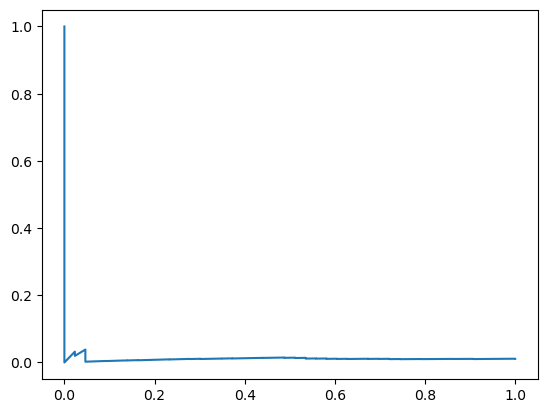

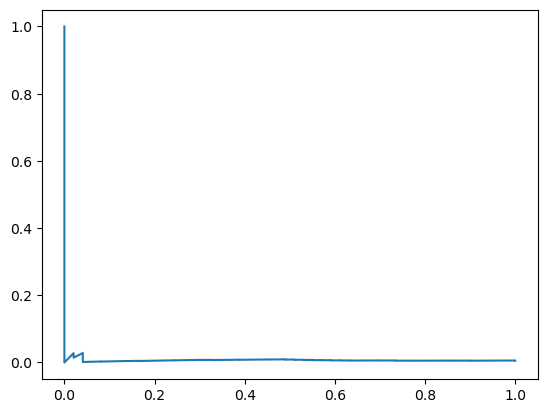

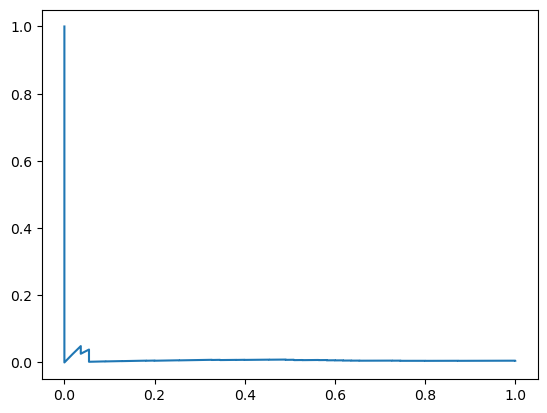

In [99]:
for t in [0.5]:
    for l in range(3): # difficulties
        (fpr, tpr, th), (precision, recall, prc_thresholds), auroc, auprc = get_roc_auc_logits(
            torch.cat([t.reshape(-1) for t in id_kitti_densities_dict[l, t]]), torch.cat([t.reshape(-1) for t in ood_kitti_densities_dict[l, t]]), 'cuda'
        )
        plt.figure()
        plt.plot(recall[::-1], precision[::-1])

In [72]:
for t in thresholds:
    for l in range(3): # difficulties
        (fpr, tpr, th), (precision, recall, prc_thresholds), auroc, auprc = get_roc_auc_logits(
            torch.cat([t.reshape(-1) for t in id_kitti_entropies_dict[l, t]]), torch.cat([t.reshape(-1) for t in ood_all_entropies_dict[l, t]]), 'cuda'
        )
        print(f"{l} ({t}):", auroc)

0 (0.0): 0.6308351492784594
1 (0.0): 0.5366750873320288
2 (0.0): 0.5136891119968255
0 (0.05): 0.45956029283534366
1 (0.05): 0.4642128819929028
2 (0.05): 0.46818111123698414
0 (0.1): 0.4705773222387538
1 (0.1): 0.4836633610997817
2 (0.1): 0.47931907899168724
0 (0.15): 0.44927720711945457
1 (0.15): 0.47516379372869466
2 (0.15): 0.462358688803034
0 (0.2): 0.48596188195575796
1 (0.2): 0.4826091214738611
2 (0.2): 0.4723972565113095
0 (0.25): 0.47297541735785126
1 (0.25): 0.48225136358361376
2 (0.25): 0.4744406850168229
0 (0.3): 0.4833241404669976
1 (0.3): 0.47032379042228756
2 (0.3): 0.47113551199874826
0 (0.35): 0.4808033826638478
1 (0.35): 0.46684272300469487
2 (0.35): 0.47449717830879745
0 (0.4): 0.44597560975609757
1 (0.4): 0.43125644283556686
2 (0.4): 0.43657231318267675
0 (0.45): 0.4445863746958637
1 (0.45): 0.4372870230713368
2 (0.45): 0.4295456312780409
0 (0.5): 0.43574179708449123
1 (0.5): 0.4349491321100963
2 (0.5): 0.4267429622619816
0 (0.55): 0.42758928049564554
1 (0.55): 0.4291